In [1]:
import pandas as pd
import numpy as np

In [2]:
#load data from csv file
dataframe = pd.read_csv('/Users/himal/Desktop/courses/SoftwareAI/project/realtor_data.csv')
#dataframe.head(10)

In [3]:
#new dataframe with only necessary features 
new_dataframe = dataframe[['status', 'bed', 'bath', 'acre_lot', 'state', 'house_size', 'price']].copy()


In [4]:
# the number of NaN for each column in the DataFrame
null_counts = new_dataframe.isnull().sum()
null_counts

status            0
bed           24950
bath          24888
acre_lot      14013
state             0
house_size    24918
price             0
dtype: int64

In [5]:
#non-null values for each column in the DataFrame
not_null_count=new_dataframe.count()
not_null_count

status        100000
bed            75050
bath           75112
acre_lot       85987
state         100000
house_size     75082
price         100000
dtype: int64

In [6]:
house_count_by_state = new_dataframe['state'].value_counts()
print(house_count_by_state)

Massachusetts     52694
Puerto Rico       24679
Connecticut       12178
Virgin Islands     2573
Rhode Island       2401
New Hampshire      2232
New York           1874
Vermont            1324
South Carolina       24
Tennessee            16
Virginia              3
New Jersey            2
Name: state, dtype: int64


In [7]:
#drops any rows from the dataframe that contain at least one NaN in any column
new_dataframe2 = new_dataframe.dropna(how='any')
#new_dataframe2

In [8]:
# change for_sale = 1 and ready_to_built = 0 i.e. binary data
new_dataframe3 = pd.DataFrame(new_dataframe2)
new_dataframe3.loc[:, 'status'] = new_dataframe3['status'].apply(lambda x: 1 if x == 'for_sale' else 0)

#new_dataframe3.loc[73008:73021, 'status'] = new_dataframe3.loc[73008:73021, 'status'].apply(lambda x: 1 if x == 'for_sale' else 0)
#dataframe_subset = new_dataframe3.loc[73008:73021]
#print(dataframe_subset)


In [9]:
# Extract features and target variable
X = new_dataframe3.drop('price', axis=1)
y = new_dataframe3['price'] #target

In [10]:
# Preprocessing steps

# Define the preprocessing steps for numerical and categorical features
numerical_features = ['bed', 'bath', 'acre_lot', 'house_size', 'status']
categorical_features = ['state']
#categorical_features = ['status',   'state']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score 
from sklearn.ensemble import RandomForestRegressor

In [12]:
#make numerical features have similar scale values
numerical_transformer = StandardScaler()

#convert each categorical feature into multiple binary features
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')


In [13]:
# Preprocessing class
preprocessor = ColumnTransformer(
    transformers=[
        #numericla transform for column specified in numericla_features
        ('num', numerical_transformer, numerical_features),
        #categotical transform of column specified in categorical_features
        ('cat', categorical_transformer, categorical_features)
    ])


In [14]:
# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

In [15]:
# Split the preprocessed data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)


# RANDOM FOREST REGRESSION

In [16]:
# random forest regressor
model = RandomForestRegressor(random_state=42)


In [17]:
# Fit the model to the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [18]:
# Predict house prices using the trained model
predictions = model.predict(X_test)
predictions_df = pd.DataFrame(predictions)
#predictions_df

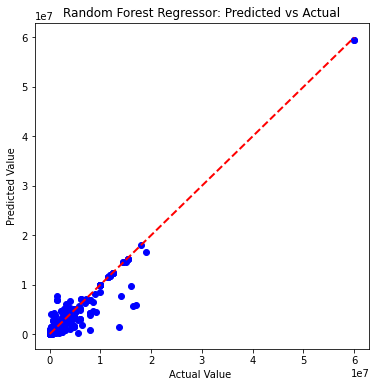

In [19]:
import matplotlib.pyplot as plt

# Plot of predicted values in  linear plot 
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions_df, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Value ')
plt.ylabel('Predicted Value')
plt.title('Random Forest Regressor: Predicted vs Actual')
plt.show()

In [20]:
#mean square error
mse = mean_squared_error(y_test, predictions_df)
print('Mean Squared Error for random forest regression:', mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error for linear regrression is:', rmse)

Mean Squared Error for random forest regression: 60942947872.3715
Root Mean Squared Error for linear regrression is: 246866.25502966478


In [21]:
#Calculate R-squared score
r2 = r2_score(y_test, predictions_df)
print('R-squared for random forest regression:', r2)

R-squared for random forest regression: 0.9426519562456948


# LINEAR REGRESSION MODEL 

In [22]:
# linear regression model
model2 = LinearRegression()

In [23]:
# Fit the model to the training dataset
model2.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict house prices using the trained model
predictions2 = model2.predict(X_test)
predictions2_df = pd.DataFrame(predictions2)
#predictions2_df

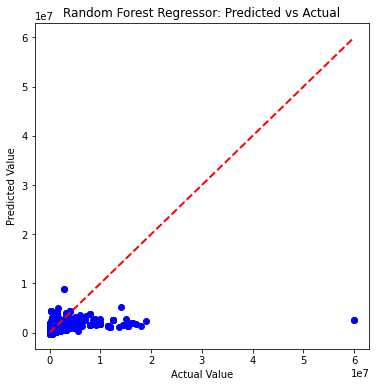

In [25]:
#  Plot of predicted values in  linear plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions2_df, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Random Forest Regressor: Predicted vs Actual')
plt.show()

Here, red dotted line is perfect prediction line and blue dots are predicted values 

In [26]:
#mean square error
mse2 = mean_squared_error(y_test, predictions2_df)
print('Mean Squared Error for linear regression model :', mse2)
rmse2 = np.sqrt(mse2)
print('Root Mean Squared Error for linear regrression is:', rmse2)

Mean Squared Error for linear regression model : 870283996891.2721
Root Mean Squared Error for linear regrression is: 932890.1312004925


In [27]:
# R-squared score
r2_2 = r2_score(y_test, predictions2_df)
print('R-squared for linear regression model:', r2_2)

R-squared for linear regression model: 0.1810523370659164


# DECISION TREE

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Create the decision tree regressor
model4 = DecisionTreeRegressor(random_state=42)

In [29]:
# Fit the model to the training data
model4.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
# Predict house prices using the trained model
predictions4 = model4.predict(X_test)
predictions4_df = pd.DataFrame(predictions4)

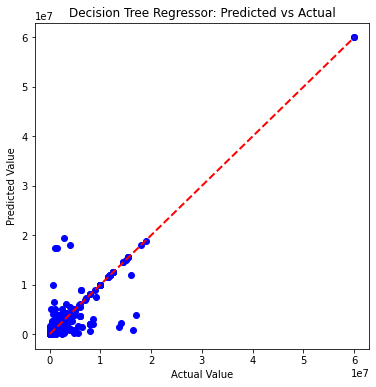

In [31]:
# Plot of predicted values in  linear plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions4_df, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Decision Tree Regressor: Predicted vs Actual')
plt.show()

In [32]:
mse4 = mean_squared_error(y_test, predictions4_df)
print('Mean Squared Error for decision tree is:', mse4)

rmse4 = np.sqrt(mse4)
print('Root Mean Squared Error for decision tree is:', rmse4)

mae4 = mean_absolute_error(y_test, predictions4_df)
print('Mean Absolute Error for decision tree is:', mae4)

r2_4= r2_score(y_test, predictions4_df)
print('R-squared for decision tree is:', r2_4)


Mean Squared Error for decision tree is: 141943209922.19012
Root Mean Squared Error for decision tree is: 376753.5134835376
Mean Absolute Error for decision tree is: 30359.651683723034
R-squared for decision tree is: 0.8664297396592684


#  KNN model

In [33]:
from sklearn.neighbors import KNeighborsRegressor

# Define neighbor values
neighbor_values = [1, 2, 3, 5, 15]

Mean Squared Error for KNN model with (n=1)is : 75376214914.00093
Root Mean Squared Error for decision tree is: 274547.2908516872
R-squared for KNN model with (n=1): 0.9290700791176902


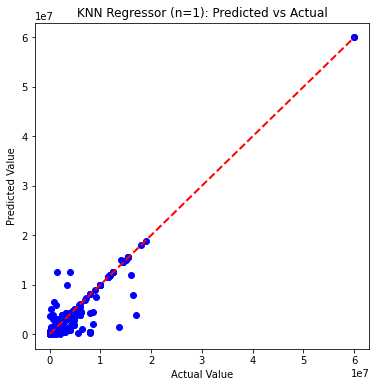

Mean Squared Error for KNN model with (n=2)is : 89142693383.30315
Root Mean Squared Error for decision tree is: 298567.7366751189
R-squared for KNN model with (n=2): 0.9161156580211984


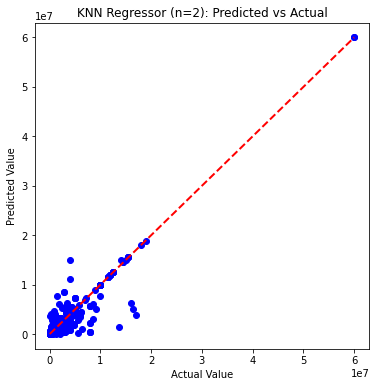

Mean Squared Error for KNN model with (n=3)is : 96477905847.064
Root Mean Squared Error for decision tree is: 310608.9275070245
R-squared for KNN model with (n=3): 0.9092131352518726


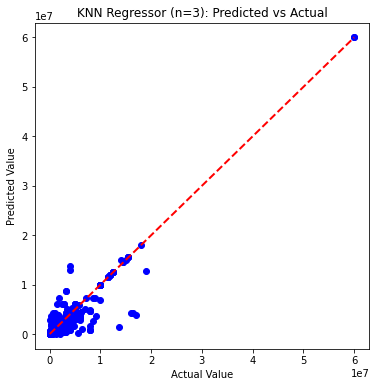

Mean Squared Error for KNN model with (n=5)is : 125615586956.46849
Root Mean Squared Error for decision tree is: 354422.8928222167
R-squared for KNN model with (n=5): 0.8817942283972099


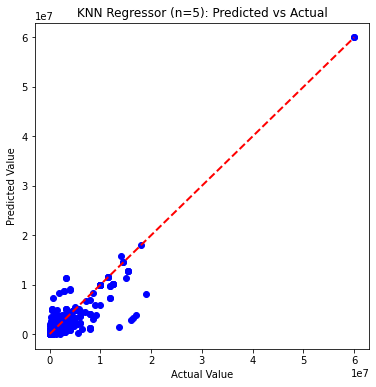

Mean Squared Error for KNN model with (n=15)is : 333579670044.3271
Root Mean Squared Error for decision tree is: 577563.5636398188
R-squared for KNN model with (n=15): 0.6860975357918084


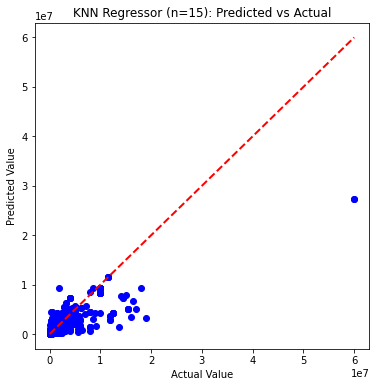

In [62]:
for n in neighbor_values:
    # Create the KNN regressor
    model3 = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    model3.fit(X_train, y_train)
    
    # Predict house prices using the trained model
    predictions3 = model3.predict(X_test)
    predictions3_df = pd.DataFrame(predictions3)
    
    #mean square error
    mse_knn = mean_squared_error(y_test, predictions3_df)
    print(f'Mean Squared Error for KNN model with (n={n})is :', mse_knn)
    
    #root mean square error
    rmse_knn = np.sqrt(mse_knn)
    print('Root Mean Squared Error for decision tree is:', rmse_knn)

    # R-squared score
    r2_knn = r2_score(y_test, predictions3_df)
    print(f'R-squared for KNN model with (n={n}):', r2_knn)
    
     
    
    #  Plot of predicted values in  linear plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, predictions3_df, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title(f'KNN Regressor (n={n}): Predicted vs Actual')
    plt.show()

# Predicting the price of new house data samples created randomly

In [36]:
#Create new random data sample
sampleDF_test = pd.DataFrame(columns=['status', 'bed', 'bath', 'acre_lot', 'house_size'])
states_test = ['Connecticut', 'Massachusetts', 'New Hampshire','New York','Puerto Rico','Rhode Island','South Carolina','Vermont','Virgin Islands']
 
#'New Jersey','Tennessee', 'Virgin' excluding these states as they have less number of datas  
    
empty_df = []
for i in range(50):
    row = {
        'status': np.random.choice([0, 1]),
        'bed': np.random.randint(1, 5),
        'bath': np.random.randint(1, 4),
        'acre_lot': np.random.randint(0.15,10.67),
        'state': np.random.choice(states_test),
        'house_size': np.random.randint(181,9999)
        
    }
    empty_df.append(pd.DataFrame(row, index=[i]))

sampleDF_test = pd.concat(empty_df, ignore_index=True)

In [37]:
states_test

['Connecticut',
 'Massachusetts',
 'New Hampshire',
 'New York',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'Vermont',
 'Virgin Islands']

In [38]:
#sampleDF_test

In [39]:
# Preprocess the new data sample
sampleDF_test_preprocessed = preprocessor.transform(sampleDF_test)


# For KNN module


In [40]:
knn_test_pred=model3.predict(sampleDF_test_preprocessed)


In [66]:
#knn_test_pred=knn.predict(df_test)
df_test_knn11= sampleDF_test.copy()
df_test_knn11['price']= knn_test_pred
df_test_knn11.head(10)
print(n)

15


# decision_tree

In [42]:
#prediction for decison tree
decision_tree_test_pred=model4.predict(sampleDF_test_preprocessed)

#copy the predivted values to sample data frame
df_test_decision_tree=sampleDF_test .copy()
df_test_decision_tree['price']= decision_tree_test_pred
df_test_decision_tree.head(10)

,status,bed,bath,acre_lot,state,house_size,price
0,0,4,2,4,Massachusetts,3416,875000.0
1,0,3,1,6,South Carolina,1567,99999.0
2,0,4,3,8,Vermont,334,379000.0
3,1,1,2,6,New York,6944,1300000.0
4,0,1,3,8,New York,8749,579900.0
5,1,4,1,5,Puerto Rico,9156,1690000.0
6,1,2,2,8,Virgin Islands,2085,375000.0
7,1,2,2,9,Virgin Islands,6642,949000.0
8,1,2,2,3,New Hampshire,7720,579900.0
9,0,1,2,5,New Hampshire,8928,579900.0


# RandomForest

In [43]:
#prediction random forest
RandomForest_test_pred=model.predict(sampleDF_test_preprocessed)

#copy the predivted values to sample data frame
df_test_RandomForest= sampleDF_test.copy()
df_test_RandomForest['price']= RandomForest_test_pred
df_test_RandomForest.head()

,status,bed,bath,acre_lot,state,house_size,price
0,0,4,2,4,Massachusetts,3416,433554.97
1,0,3,1,6,South Carolina,1567,229355.75
2,0,4,3,8,Vermont,334,277147.00
3,1,1,2,6,New York,6944,812601.00
4,0,1,3,8,New York,8749,1002097.88


# result comparison

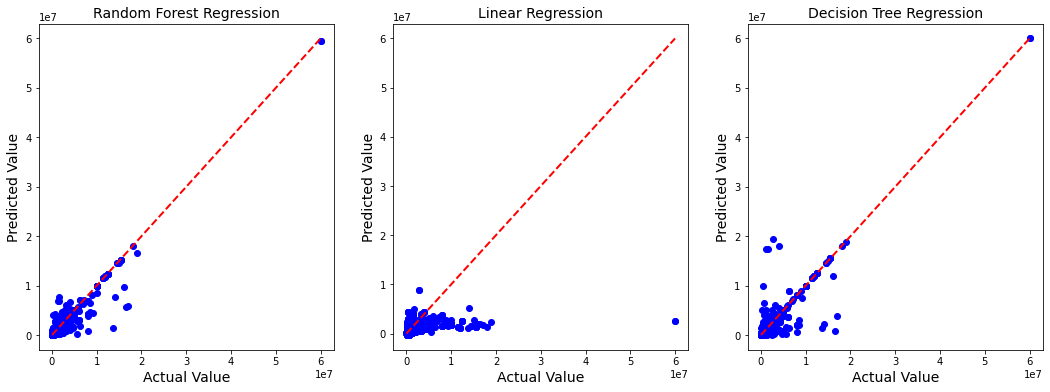

In [59]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Random Forest
axs[0].scatter(y_test, predictions_df, color='blue')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
axs[0].set_xlabel('Actual Value',fontsize=14)
axs[0].set_ylabel('Predicted Value',fontsize=14)
axs[0].set_title('Random Forest Regression',fontsize=14)

# Plot for Linear Regression
axs[1].scatter(y_test, predictions2_df, color='blue')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
axs[1].set_xlabel('Actual Value',fontsize=14)
axs[1].set_ylabel('Predicted Value',fontsize=14)
axs[1].set_title('Linear Regression',fontsize=14)

# Plot for Decision Tree
axs[2].scatter(y_test, predictions4_df, color='blue')
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
axs[2].set_xlabel('Actual Value',fontsize=14)
axs[2].set_ylabel('Predicted Value',fontsize=14)
axs[2].set_title('Decision Tree Regression',fontsize=14)

plt.show()

In [57]:
# Initialize an empty DataFrame
combined_results_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R-squared'])

# Add results for each model
combined_results_df.loc[0] = ['Linear Regression', mse2, rmse2, r2_2]
combined_results_df.loc[1] = ['Random Forest', mse, rmse, r2]
combined_results_df.loc[2] = ['Decision Tree', mse4, rmse4, r2_4]


# Display the results table
print("The result of three different models:")
combined_results_df

The result of three different models:


,Model,MSE,RMSE,R-squared
0,Linear Regression,8.702840e+11,932890.131200,0.181052
1,Random Forest,6.094295e+10,246866.255030,0.942652
2,Decision Tree,1.419432e+11,376753.513484,0.866430


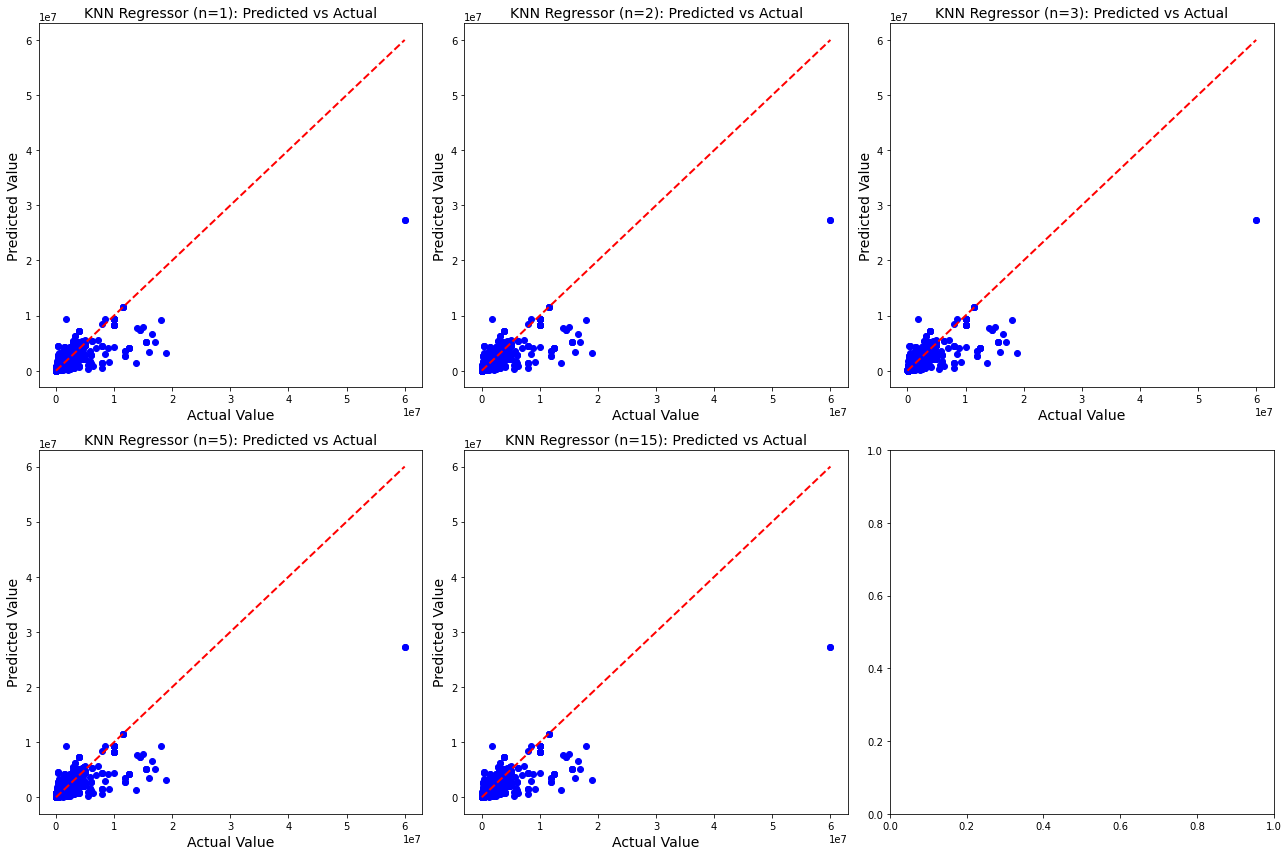

The Reasult for KNN-model with different values of n:


,n,MSE,RMSE,R-squared
0,1.0,7.537621e+10,274547.290852,0.929070
1,2.0,8.914269e+10,298567.736675,0.916116
2,3.0,9.647791e+10,310608.927507,0.909213
3,5.0,1.256156e+11,354422.892822,0.881794
4,15.0,3.335797e+11,577563.563640,0.686098


In [61]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Dataframe to store results for knn module
results_df2 = pd.DataFrame(columns=['n', 'MSE', 'RMSE', 'R-squared'])
    

for i, n in enumerate(neighbor_values):
    # Create the KNN regressor
    model33 = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    model33.fit(X_train, y_train)
    
    # Predict house prices using the trained model
    predictions33 = model33.predict(X_test)
    predictions33_df = pd.DataFrame(predictions33)
    
    # Calculate metrics
    mse_knn = mean_squared_error(y_test, predictions33_df)
    rmse_knn = np.sqrt(mse_knn)
    r2_knn = r2_score(y_test, predictions33_df)
    
    # Print metrics
    #print(f'Mean Squared Error (n={n}):', mse_knn)
    #print(f'Root Mean Squared Error (n={n}):', rmse_knn)
    #print(f'R-squared (n={n}):', r2_knn)
    
    # Store results in the dataframe
    results_df2.loc[i] = [n, mse_knn, rmse_knn, r2_knn]
    
    # Plot the predicted values in a linear plot
    row = i // 3
    col = i % 3
    axs[row, col].scatter(y_test, predictions3_df, color='blue')
    axs[row, col].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    axs[row, col].set_xlabel('Actual Value',fontsize=14)
    axs[row, col].set_ylabel('Predicted Value',fontsize=14)
    axs[row, col].set_title(f'KNN Regressor (n={n}): Predicted vs Actual',fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

print("The Reasult for KNN-model with different values of n:")
results_df2